<a href="https://colab.research.google.com/github/vsinyutsina/deep_learning/blob/master/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import sklearn as sl
import matplotlib.pyplot as plt

### Загрузка файлов

In [0]:
train_data = pd.read_csv("/content/drive/My Drive/school-21-student-expulsion-prediction/train.csv")

In [3]:
train_data.head()

,id,Birth date,Native city,Gender,Wave id,Level,Heard about school from,Life status,day_00,day_01,day_02,day_03,day_04,day_05,day_06,day_07,day_08,day_09,day_10,day_11,day_12,day_13,evalexpr,match_n_match,bsq,rush_00,rush_01,rush_02,exam_00,exam_01,exam_02,exam_final,Contract termination date,Memory entrance game,Logic entrance game,contract_status
0,129212391,1990-01-18,Пермь,male,3,7.463235,google_ads,work,5,NaN,0.0,80.0,0.0,1.0,0.0,15.0,10.0,0.0,50.0,21.0,20.0,55.0,81.0,0.0,0.0,0.0,0.0,0.0,75.0,43.0,100.0,44.0,NaN,9,11,1
1,566688420,1996-07-31,Волгоград,female,1,8.785714,NaN,NaN,0,NaN,10.0,45.0,5.0,1.0,35.0,0.0,5.0,16.0,0.0,9.0,0.0,10.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,16.0,22.0,22.0,NaN,7,10,1
2,242300495,1992-06-27,Новосибирск,female,2,6.775000,other,work,0,NaN,20.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,16.0,27.0,NaN,7,11,1
3,715424753,1996-06-15,Тула,female,1,8.146104,NaN,NaN,5,0.0,35.0,25.0,20.0,2.0,70.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,27.0,NaN,9,6,1
4,382884118,1968-07-18,Голицыно,male,3,4.272727,other,other,0,0.0,NaN,5.0,85.0,3.0,50.0,40.0,0.0,12.0,40.0,5.0,0.0,0.0,0.0,60.0,0.0,120.0,0.0,0.0,80.0,38.0,0.0,45.0,NaN,7,12,1


In [0]:
test_data = pd.read_csv("/content/drive/My Drive/school-21-student-expulsion-prediction/test.csv")

In [60]:
test_data.head()

,id,Birth date,Native city,Gender,Wave id,Level,Heard about school from,Life status,day_00,day_01,day_02,day_03,day_04,day_05,day_06,day_07,day_08,day_09,day_10,day_11,day_12,day_13,evalexpr,match_n_match,bsq,rush_00,rush_01,rush_02,exam_00,exam_01,exam_02,exam_final,Contract termination date,Memory entrance game,Logic entrance game
0,685512434,1992-09-08,г. Тюмень,male,3,8.834416,google_ads,work,10,NaN,80.0,40.0,30.0,5.0,70.0,10.0,40.0,0.0,85.0,21.0,0.0,20.0,100.0,0.0,100.0,120.0,0.0,0.0,75.0,43.0,64.0,45.0,NaN,10,12
1,157712083,1993-12-02,Москва,male,2,2.172414,from_21_student,work,7,0.0,0.0,50.0,0.0,5.0,20.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,80.0,22.0,33.0,36.0,NaN,7,6
2,672158583,1989-02-16,Москва,male,3,4.310160,from_friends,other,5,0.0,0.0,5.0,10.0,-42.0,35.0,20.0,5.0,9.0,35.0,21.0,10.0,10.0,0.0,60.0,0.0,0.0,0.0,75.0,0.0,6.0,33.0,9.0,NaN,7,10
3,1205321261,1997-07-16,Дзержинский,female,2,6.295833,other,study,20,0.0,30.0,0.0,10.0,0.0,20.0,0.0,0.0,NaN,10.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,15.0,1.0,16.0,22.0,NaN,9,8
4,621191476,1997-02-22,Москва,male,1,7.110294,NaN,NaN,100,100.0,80.0,30.0,0.0,2.0,0.0,40.0,10.0,6.0,0.0,-42.0,0.0,15.0,0.0,60.0,100.0,0.0,0.0,0.0,65.0,65.0,54.0,36.0,NaN,9,15


In [0]:
sample_submission = pd.read_csv("/content/drive/My Drive/school-21-student-expulsion-prediction/sample_submission.csv")

In [7]:
sample_submission.head()

,id,contract_status
0,685512434,0
1,157712083,0
2,672158583,0
3,1205321261,0
4,621191476,0


### Обработка пропусков

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 36 columns):
id                           1060 non-null int64
Birth date                   1060 non-null object
Native city                  1047 non-null object
Gender                       1060 non-null object
Wave id                      1060 non-null int64
Level                        1060 non-null float64
Heard about school from      653 non-null object
Life status                  655 non-null object
day_00                       1060 non-null int64
day_01                       646 non-null float64
day_02                       1044 non-null float64
day_03                       1045 non-null float64
day_04                       1037 non-null float64
day_05                       1056 non-null float64
day_06                       1048 non-null float64
day_07                       1046 non-null float64
day_08                       1045 non-null float64
day_09                       1047 non-nu

In [9]:
train_data.isnull().sum() # количество пропусков в данных

id                             0
Birth date                     0
Native city                   13
Gender                         0
Wave id                        0
Level                          0
Heard about school from      407
Life status                  405
day_00                         0
day_01                       414
day_02                        16
day_03                        15
day_04                        23
day_05                         4
day_06                        12
day_07                        14
day_08                        15
day_09                        13
day_10                        32
day_11                        13
day_12                        10
day_13                        31
evalexpr                      57
match_n_match                109
bsq                           33
rush_00                       64
rush_01                      116
rush_02                      158
exam_00                       13
exam_01                       19
exam_02   

In [10]:
train_data.shape[0] # Количество наблюдений

1060

Все пропуски в днях и проектах будут заполнены 0.
Life status и heard about school from содержат больше половины пропусков. Необходимо определить их значимость. Предполагаю, что они никак не влияют на таргет.

In [0]:
train_data['Life status'].fillna('No info', inplace=True)

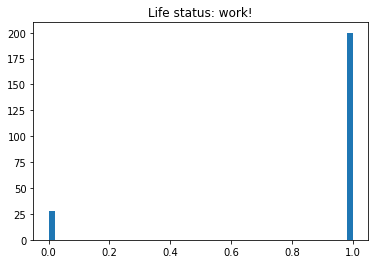

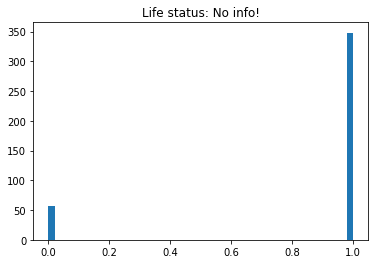

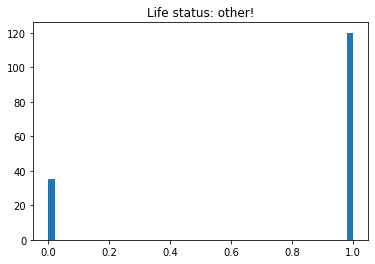

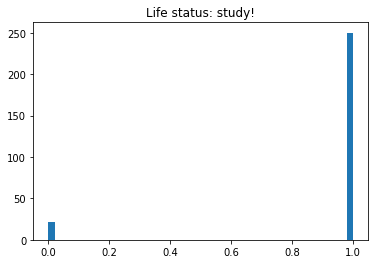

In [12]:
for status in train_data['Life status'].unique():
    current_data = train_data[train_data['Life status'] == status]
    plt.title('Life status: %s!' % status)
    plt.hist(current_data['contract_status'], bins=np.linspace(0, 1))
    plt.show()

Кажется, life status оказывал влияние на то, взяли человека или нет.

In [0]:
train_data['Heard about school from'].fillna('No info', inplace=True)

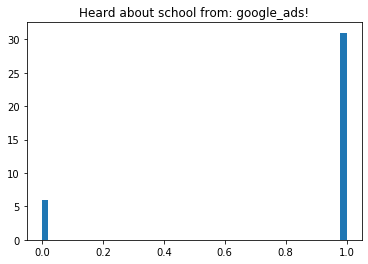

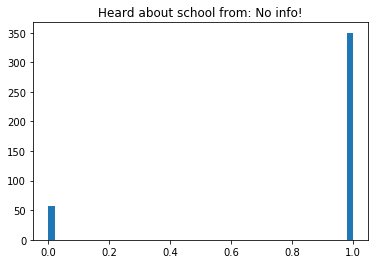

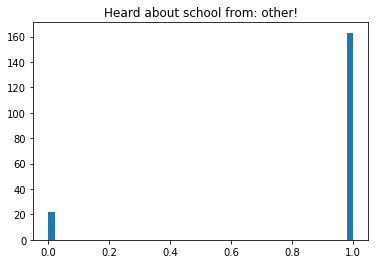

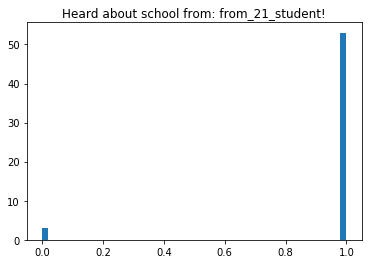

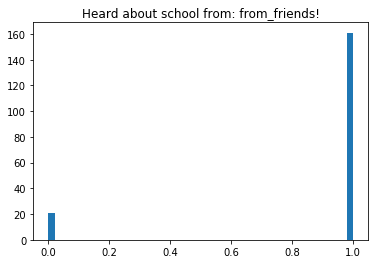

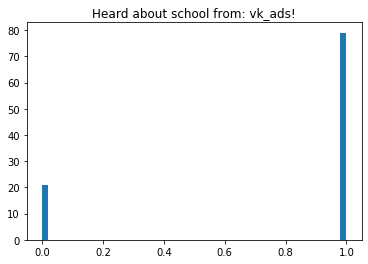

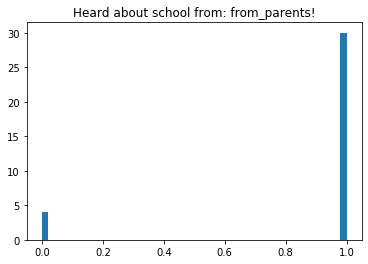

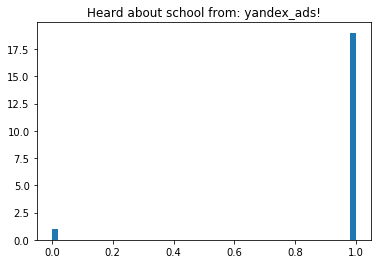

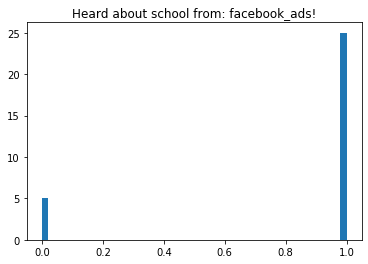

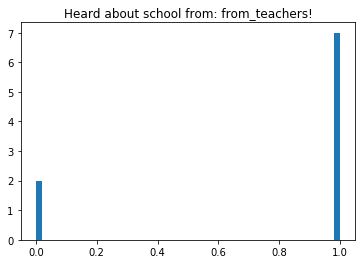

In [14]:
for status in train_data['Heard about school from'].unique():
    current_data = train_data[train_data['Heard about school from'] == status]
    plt.title('Heard about school from: %s!' % status)
    plt.hist(current_data['contract_status'], bins=np.linspace(0, 1))
    plt.show()

In [0]:
for i in np.arange(8, train_data.shape[1]):
  train_data.iloc[:,i].fillna(0, inplace=True)

In [0]:
del train_data['Contract termination date'] # ваще самый бесполезный признак

In [0]:
del train_data['Native city'] # предполагаю, что это не самый важный признак и его можно удалить. 

In [18]:
train_data.isnull().sum()

id                         0
Birth date                 0
Gender                     0
Wave id                    0
Level                      0
Heard about school from    0
Life status                0
day_00                     0
day_01                     0
day_02                     0
day_03                     0
day_04                     0
day_05                     0
day_06                     0
day_07                     0
day_08                     0
day_09                     0
day_10                     0
day_11                     0
day_12                     0
day_13                     0
evalexpr                   0
match_n_match              0
bsq                        0
rush_00                    0
rush_01                    0
rush_02                    0
exam_00                    0
exam_01                    0
exam_02                    0
exam_final                 0
Memory entrance game       0
Logic entrance game        0
contract_status            0
dtype: int64

In [0]:
train_data['contract_status'] = [str(train_data['contract_status'][i]) for i in np.arange(train_data.shape[0])] # приведение таргета к str

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 34 columns):
id                         1060 non-null int64
Birth date                 1060 non-null object
Gender                     1060 non-null object
Wave id                    1060 non-null int64
Level                      1060 non-null float64
Heard about school from    1060 non-null object
Life status                1060 non-null object
day_00                     1060 non-null int64
day_01                     1060 non-null float64
day_02                     1060 non-null float64
day_03                     1060 non-null float64
day_04                     1060 non-null float64
day_05                     1060 non-null float64
day_06                     1060 non-null float64
day_07                     1060 non-null float64
day_08                     1060 non-null float64
day_09                     1060 non-null float64
day_10                     1060 non-null float64
day_11               

In [0]:
gender = {
    'male': 1,
    'female':0
}

In [0]:
del train_data['Heard about school from']
del train_data['Life status']

In [0]:
del train_data['id']

In [24]:
for i in np.arange(train_data.shape[0]):
  train_data['Gender'][i] = gender[train_data['Gender'][i]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Обучение

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
y_pred = train_data['contract_status']
del train_data['contract_status']
del train_data['Birth date']

X_train, X_val, y_train, y_val = train_test_split(train_data, y_pred, train_size=0.7, random_state=42)

In [0]:
try:
  from catboost import CatBoostClassifier, Pool
except ModuleNotFoundError:
  !pip install catboost

In [0]:
cat_boost_params = {
    'task_type': 'CPU',
    'loss_function': 'CrossEntropy',
    'eval_metric': 'AUC',
    'iterations': 300,
    'od_pval': 1e-5
}

In [34]:
train_data.head()

,Gender,Wave id,Level,day_00,day_01,day_02,day_03,day_04,day_05,day_06,day_07,day_08,day_09,day_10,day_11,day_12,day_13,evalexpr,match_n_match,bsq,rush_00,rush_01,rush_02,exam_00,exam_01,exam_02,exam_final,Memory entrance game,Logic entrance game
0,1,3,7.463235,5,0.0,0.0,80.0,0.0,1.0,0.0,15.0,10.0,0.0,50.0,21.0,20.0,55.0,81.0,0.0,0.0,0.0,0.0,0.0,75.0,43.0,100.0,44.0,9,11
1,0,1,8.785714,0,0.0,10.0,45.0,5.0,1.0,35.0,0.0,5.0,16.0,0.0,9.0,0.0,10.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,16.0,22.0,22.0,7,10
2,0,2,6.775000,0,0.0,20.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,27.0,7,11
3,0,1,8.146104,5,0.0,35.0,25.0,20.0,2.0,70.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,27.0,9,6
4,1,3,4.272727,0,0.0,0.0,5.0,85.0,3.0,50.0,40.0,0.0,12.0,40.0,5.0,0.0,0.0,0.0,60.0,0.0,120.0,0.0,0.0,80.0,38.0,0.0,45.0,7,12


In [39]:
train = Pool(X_train, y_train)
val = Pool(X_val, y_val)

classifier = CatBoostClassifier(**cat_boost_params)

basemodel = classifier.fit(train, use_best_model=True, eval_set=val)

0:	test: 0.8388049	best: 0.8388049 (0)	total: 1.75ms	remaining: 522ms
1:	test: 0.8246168	best: 0.8388049 (0)	total: 3.49ms	remaining: 520ms
2:	test: 0.8361123	best: 0.8388049 (0)	total: 5.25ms	remaining: 520ms
3:	test: 0.8296396	best: 0.8388049 (0)	total: 6.86ms	remaining: 508ms
4:	test: 0.8513877	best: 0.8513877 (4)	total: 9.28ms	remaining: 548ms
5:	test: 0.8789354	best: 0.8789354 (5)	total: 12.7ms	remaining: 624ms
6:	test: 0.8846313	best: 0.8846313 (6)	total: 14.2ms	remaining: 596ms
7:	test: 0.8885667	best: 0.8885667 (7)	total: 15.9ms	remaining: 580ms
8:	test: 0.9000621	best: 0.9000621 (8)	total: 17.6ms	remaining: 570ms
9:	test: 0.9076222	best: 0.9076222 (9)	total: 19.2ms	remaining: 558ms
10:	test: 0.9027548	best: 0.9076222 (9)	total: 20.9ms	remaining: 549ms
11:	test: 0.9262635	best: 0.9262635 (11)	total: 22.5ms	remaining: 541ms
12:	test: 0.9365162	best: 0.9365162 (12)	total: 24.3ms	remaining: 535ms
13:	test: 0.9333057	best: 0.9365162 (12)	total: 25.8ms	remaining: 527ms
14:	test: 0.9

In [0]:
predict_proba = basemodel.predict_proba(X_train)

In [62]:
for i in range(len(predict_proba)):
  

array([[0.63787912, 0.36212088],
       [0.21054469, 0.78945531],
       [0.04548972, 0.95451028],
       [0.02589604, 0.97410396],
       [0.04674388, 0.95325612]])

### Предсказание

In [53]:
test_data.head()

,id,Birth date,Native city,Gender,Wave id,Level,Heard about school from,Life status,day_00,day_01,day_02,day_03,day_04,day_05,day_06,day_07,day_08,day_09,day_10,day_11,day_12,day_13,evalexpr,match_n_match,bsq,rush_00,rush_01,rush_02,exam_00,exam_01,exam_02,exam_final,Contract termination date,Memory entrance game,Logic entrance game
0,685512434,1992-09-08,г. Тюмень,male,3,8.834416,google_ads,work,10,NaN,80.0,40.0,30.0,5.0,70.0,10.0,40.0,0.0,85.0,21.0,0.0,20.0,100.0,0.0,100.0,120.0,0.0,0.0,75.0,43.0,64.0,45.0,NaN,10,12
1,157712083,1993-12-02,Москва,male,2,2.172414,from_21_student,work,7,0.0,0.0,50.0,0.0,5.0,20.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,80.0,22.0,33.0,36.0,NaN,7,6
2,672158583,1989-02-16,Москва,male,3,4.310160,from_friends,other,5,0.0,0.0,5.0,10.0,-42.0,35.0,20.0,5.0,9.0,35.0,21.0,10.0,10.0,0.0,60.0,0.0,0.0,0.0,75.0,0.0,6.0,33.0,9.0,NaN,7,10
3,1205321261,1997-07-16,Дзержинский,female,2,6.295833,other,study,20,0.0,30.0,0.0,10.0,0.0,20.0,0.0,0.0,NaN,10.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,15.0,1.0,16.0,22.0,NaN,9,8
4,621191476,1997-02-22,Москва,male,1,7.110294,NaN,NaN,100,100.0,80.0,30.0,0.0,2.0,0.0,40.0,10.0,6.0,0.0,-42.0,0.0,15.0,0.0,60.0,100.0,0.0,0.0,0.0,65.0,65.0,54.0,36.0,NaN,9,15


In [0]:
for i in ['id', 'Birth date', 'Native city', 'Heard about school from', 'Life status', 'Contract termination date']:
  del test_data[i]

In [0]:
test_data['Gender'] = [gender[test_data['Gender'][i]] for i in np.arange(test_data.shape[0])]

In [0]:
for i in np.arange(test_data.shape[1]):
  test_data.iloc[:, i].fillna(0, inplace=True)

In [57]:
test_data.head()

,Gender,Wave id,Level,day_00,day_01,day_02,day_03,day_04,day_05,day_06,day_07,day_08,day_09,day_10,day_11,day_12,day_13,evalexpr,match_n_match,bsq,rush_00,rush_01,rush_02,exam_00,exam_01,exam_02,exam_final,Memory entrance game,Logic entrance game
0,1,3,8.834416,10,0.0,80.0,40.0,30.0,5.0,70.0,10.0,40.0,0.0,85.0,21.0,0.0,20.0,100.0,0.0,100.0,120.0,0.0,0.0,75.0,43.0,64.0,45.0,10,12
1,1,2,2.172414,7,0.0,0.0,50.0,0.0,5.0,20.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,22.0,33.0,36.0,7,6
2,1,3,4.310160,5,0.0,0.0,5.0,10.0,-42.0,35.0,20.0,5.0,9.0,35.0,21.0,10.0,10.0,0.0,60.0,0.0,0.0,0.0,75.0,0.0,6.0,33.0,9.0,7,10
3,0,2,6.295833,20,0.0,30.0,0.0,10.0,0.0,20.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,15.0,1.0,16.0,22.0,9,8
4,1,1,7.110294,100,100.0,80.0,30.0,0.0,2.0,0.0,40.0,10.0,6.0,0.0,-42.0,0.0,15.0,0.0,60.0,100.0,0.0,0.0,0.0,65.0,65.0,54.0,36.0,9,15


In [0]:
pred = basemodel.predict(test_data)